In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#dimensions of the dataset
print(f'''Number of rows:{df.shape[0]}
Number of columns:{df.shape[1]}''')

Number of rows:200
Number of columns:4


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the variables')

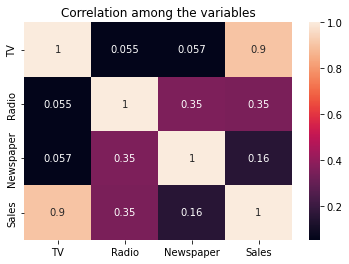

In [5]:
#correlation among the variables
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.title('Correlation among the variables')

Text(0, 0.5, 'values')

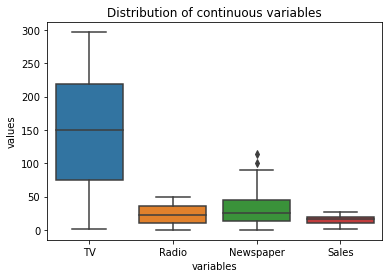

In [8]:
#distribution of the variables
melted_df=df.melt(value_vars=df.columns)
sns.boxplot(data=melted_df,x='variable',y='value')
plt.title('Distribution of continuous variables')
plt.xlabel('variables')
plt.ylabel('values')

In [9]:
#getting X and y
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
print(f'''X Train:{X_train.shape}
X Test:{X_test.shape}
y Train:{y_train.shape}
y Test:{y_test.shape}''')

X Train:(160, 3)
X Test:(40, 3)
y Train:(160,)
y Test:(40,)


In [14]:
#preprocessing
preprocess=Pipeline([
    ('scaler',StandardScaler())
])

#model
model=Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [15]:
#prediction
y_pred=model.predict(X_test)
print(f'Testing Accuracy:{round(100*r2_score(y_test,y_pred),2)}%')

Testing Accuracy:93.84%


In [16]:
#saving the mode
with open('./model.pkl','wb') as fp:
    pickle.dump(model,fp)